<a href="https://colab.research.google.com/github/Ph1so/is-the-mushroom-edible/blob/main/is_mushroom_edible.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

In [68]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

#training
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#evaluations
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, roc_auc_score

In [54]:
df_train = pd.read_csv("/content/mushroom_cleaned.csv")

In [55]:
df_train.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [56]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [57]:
df_train.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


In [58]:
df_train.isna().sum()

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

# Understanding Data

In [59]:
df_train['cap-area'] = ((df_train['cap-diameter']/2)**2)*3.1415926535

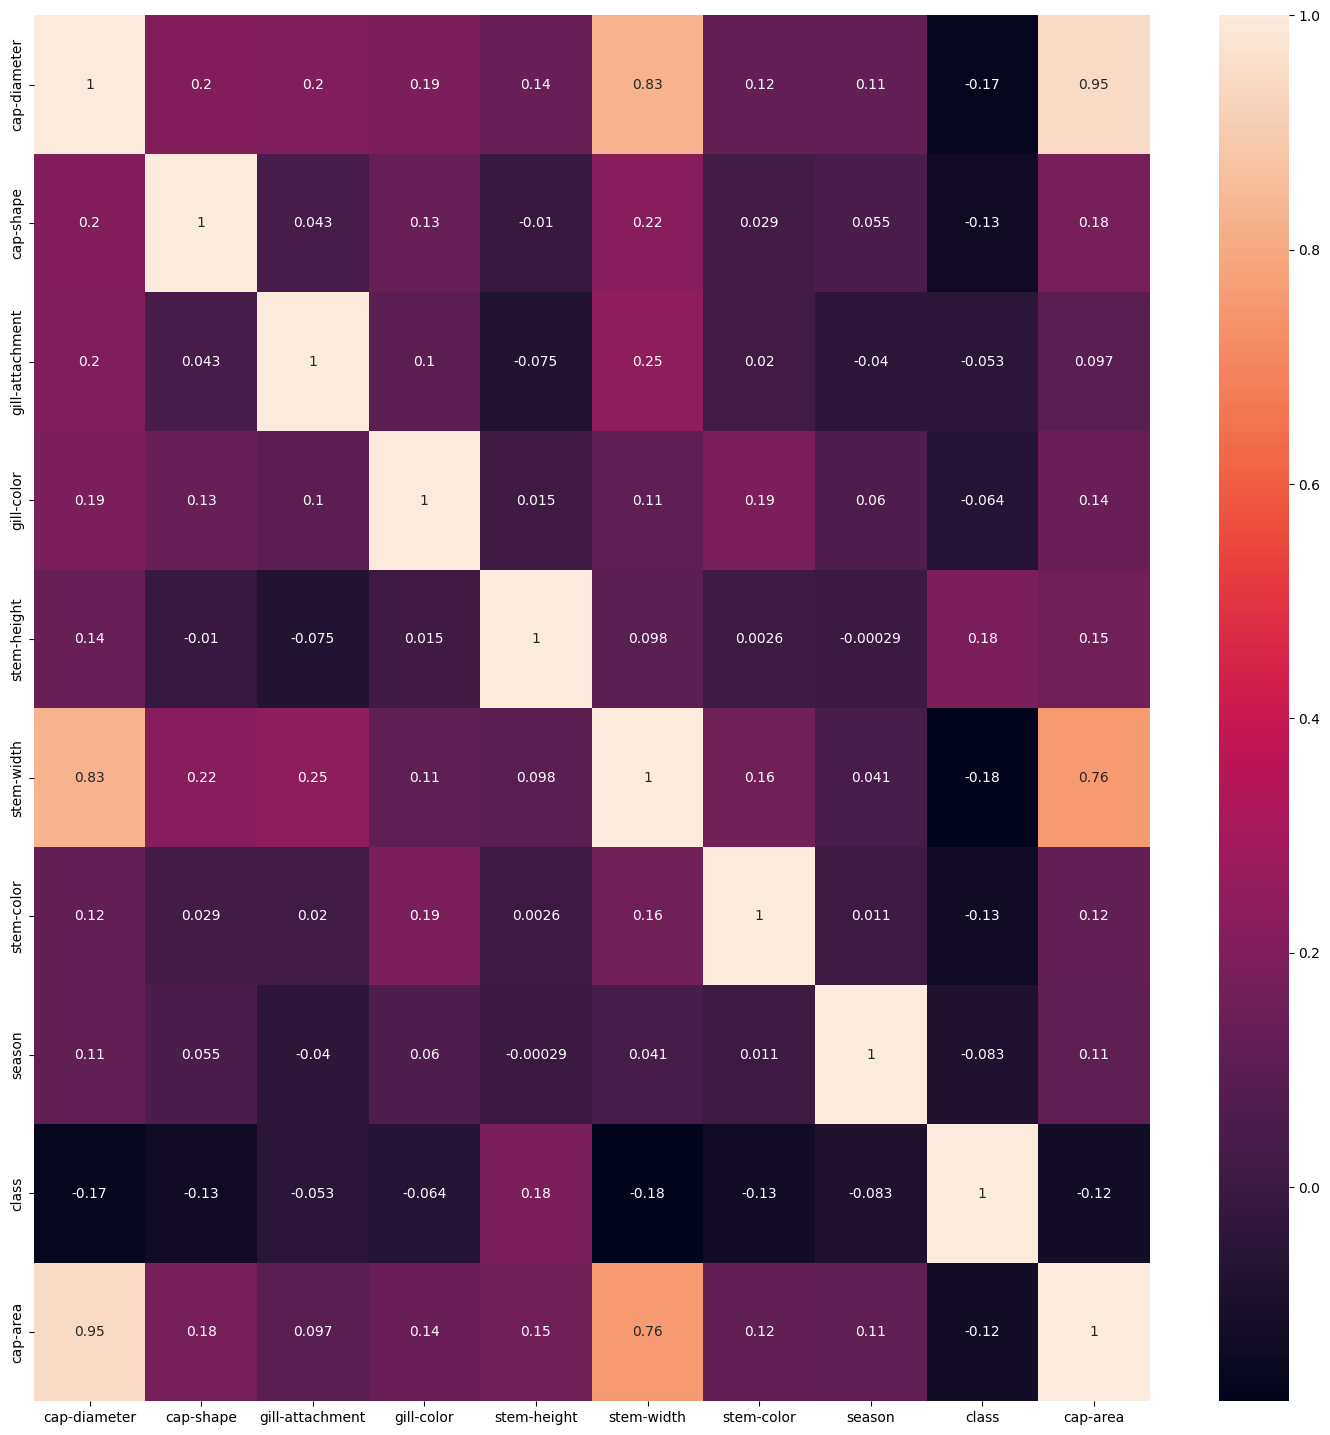

In [60]:
plt.subplots(figsize = (18, 18))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

# Prepare data

In [61]:
y = df_train['class']
df_train.drop('class', axis =1, inplace = True)
X = df_train

In [62]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.33)

In [66]:
model = RandomForestClassifier()
model.fit(xtrain, ytrain)
pred = model.predict(xtest)

# Evaluation

In [67]:
def eval(y_test, p, model):
  print(classification_report(y_test, p))
  lr_cm = confusion_matrix(y_test, p)
  sns.set_context("notebook")
  ConfusionMatrixDisplay(confusion_matrix = lr_cm, display_labels = model.classes_).plot()

  roc_auc = round(roc_auc_score(y_test, p), 4)
  accuracy = round(accuracy_score(y_test, p), 4)
  recall = round(recall_score(y_test, p), 4)
  precision = round(precision_score(y_test, p), 4)
  f_one = round(f1_score(y_test, p), 4)

  print(f"=========================")
  print(f" ROC-AUC Score: {roc_auc}")
  print(f" Accuracy Score: {accuracy}")
  print(f" Recall Score: {recall}")
  print(f" Precision Score: {precision}")
  print(f" F1-score: {f_one}")
  print(f"=========================")

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8012
           1       0.99      0.99      0.99      9820

    accuracy                           0.99     17832
   macro avg       0.99      0.99      0.99     17832
weighted avg       0.99      0.99      0.99     17832

 ROC-AUC Score: 0.9881
 Accuracy Score: 0.9882
 Recall Score: 0.9888
 Precision Score: 0.9897
 F1-score: 0.9893


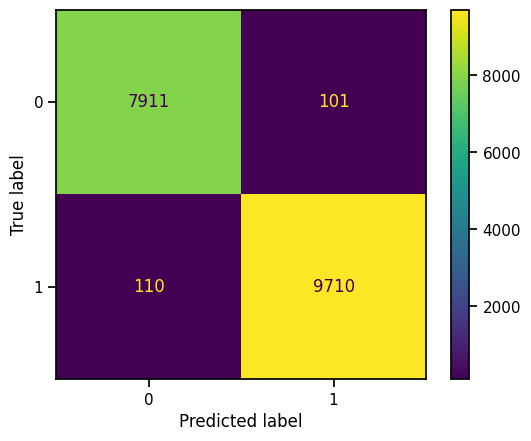

In [69]:
eval(ytest, pred, model)